<a href="https://colab.research.google.com/github/Frusan1/Ciencia_Dados/blob/main/Predi%C3%A7%C3%A3o_Ataque_Card%C3%ADaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação de bibliotecas**


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# **Importação de Dados**

In [ ]:
base_saude = pd.read_csv("saude.csv", sep=';')
base_saude.head(10)

,idade,sexo,tipoDorPeito,pressaoRepouso,colesterol,acucarSangue,eletrocardiograma,freqCardiacaMax,angina,ataqueCardiaco
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1
5,57,1,0,140,192,0,1,148,0,1
6,56,0,1,140,294,0,0,153,0,1
7,44,1,1,120,263,0,1,173,0,1
8,52,1,2,172,199,1,1,162,0,1
9,57,1,2,150,168,0,1,174,0,1


# **Seção 1: Caracterização dos Dados**



In [ ]:
# Distribuição da variável resposta
num_categorias = base_saude['ataqueCardiaco'].value_counts()
print(num_categorias)

1    165
0    138
Name: ataqueCardiaco, dtype: int64


In [ ]:
X = base_saude[['idade', 'tipoDorPeito', 'pressaoRepouso', 'colesterol', 'acucarSangue', 'eletrocardiograma', 'freqCardiacaMax']] #indique as variáveis explicativas
Y = base_saude['ataqueCardiaco'] #indique a variável resposta

In [ ]:
acuracia_modelo1 = []
acuracia_modelo2 = []
acuracia_modelo3 = []

precisao_modelo1 = []
precisao_modelo2 = []
precisao_modelo3 = []

In [ ]:
np.random.seed(14)

# Altere os parâmetros abaixo para configuar o ambiente adequadamente
iteracoes = 50
train_size = 0.7

for i in range(iteracoes):

    #PARTICIONAMENTO DE DADOS:

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size = train_size)

    #TREINAMENTO DE MODELOS:

    # Modelo 1 =  SVM
    model1 = SVC(kernel = 'linear')
    model1.fit(X_treino, Y_treino)

    # Modelo 2 =  Random Forest
    model2 = RandomForestClassifier()
    model2.fit(X_treino, Y_treino)

    # Modelo 3 =  KNN
    model3 = KNeighborsClassifier()
    model3.fit(X_treino, Y_treino)

    #TESTE/AVALIAÇÃO DE MODELOS:

    predictions1 = model1.predict(X_teste)
    acuracia_modelo1.append(accuracy_score(Y_teste, predictions1))
    precisao_modelo1.append(precision_score(Y_teste, predictions1))

    predictions2 = model2.predict(X_teste)
    acuracia_modelo2.append(accuracy_score(Y_teste, predictions2))
    precisao_modelo2.append(precision_score(Y_teste, predictions2))

    predictions3 = model3.predict(X_teste)
    acuracia_modelo3.append(accuracy_score(Y_teste, predictions3))
    precisao_modelo3.append(precision_score(Y_teste, predictions3))



# **Seção 2: Avaliação de Modelos**

In [ ]:
print('Média acurácia modelo 1:')
print(np.round(np.mean(acuracia_modelo1),2))
print('Média acurácia modelo 2:')
print(np.round(np.mean(acuracia_modelo2),2))
print('Média acurácia modelo 3:')
print(np.round(np.mean(acuracia_modelo3),2))

Média acurácia modelo 1:
0.74
Média acurácia modelo 2:
0.71
Média acurácia modelo 3:
0.63


In [ ]:
print('Média precisão modelo 1:')
print(np.round(np.mean(precisao_modelo1),2))
print('Média precisão modelo 2:')
print(np.round(np.mean(precisao_modelo2),2))
print('Média precisão modelo 3:')
print(np.round(np.mean(precisao_modelo3),2))

Média precisão modelo 1:
0.75
Média precisão modelo 2:
0.73
Média precisão modelo 3:
0.65


**Acurácia:**

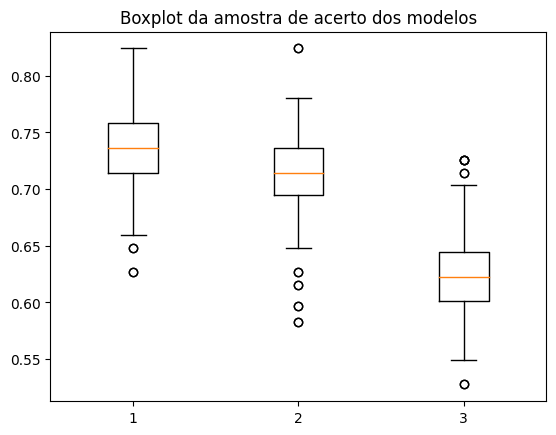

In [ ]:
dados_resultados_acuracia =[acuracia_modelo1, acuracia_modelo2, acuracia_modelo3]

plt.boxplot(dados_resultados_acuracia)
plt.title("Boxplot da amostra de acerto dos modelos")
plt.show()

**Precisão:**

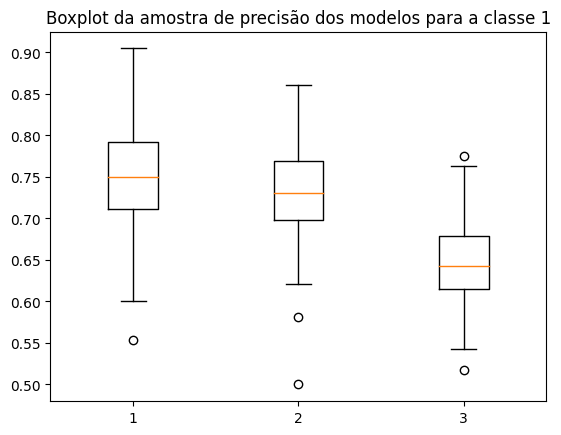

In [ ]:
dados_resultados_precisao =[precisao_modelo1, precisao_modelo2, precisao_modelo3]

plt.boxplot(dados_resultados_precisao)
plt.title("Boxplot da amostra de precisão dos modelos para a classe 1")
plt.show()

# **Seção 3: Predição do melhor modelo**

**Coleta de dados do paciente**

In [ ]:
idade = int(input('Informe a idade do paciente: '))
dor = int(input('Informe a categoria de dor no peito do paciente: '))
pressao = int(input('Informe a pressão arterial observada do paciente: '))
colesterol = int(input('Informe a taxa de colesterol observada: '))
eletro = int(input('Informe o resultado do exame eletrocardiograma do paciente: '))
frequencia = int(input('Indiue a frequência cardíaca máxima observada do paciente: '))
acucar = int(input('Foi identificado açucar no sangue do paciente? '))



Informe a idade do paciente: 51
Informe a categoria de dor no peito do paciente: 2
Informe a pressão arterial observada do paciente: 110
Informe a taxa de colesterol observada: 175
Informe o resultafo do exame eletrocardiograma do paciente: 1
Indiue a frequência cardíaca máxima observada do paciente: 123
Foi identificado açucar no sangue do paciente? 1


**Resposta do sistema**

In [ ]:
novo_paciente = [[idade, dor, pressao, colesterol,  acucar, eletro, frequencia]]
variaveis = ['idade', 'tipoDorPeito', 'pressaoRepouso', 'colesterol',	'acucarSangue',	'eletrocardiograma',	'freqCardiacaMax']
novo_paciente =  pd.DataFrame(novo_paciente, columns = variaveis)
resposta = model1.predict(novo_paciente)    #Troque  o X pelo melhor número do melhor modelo (1, 2 ou 3)

for i in range(len(resposta)):
  if resposta[i] == 1.0 :
    print('Muita chance de sofrer ataque cardíaco')
  else:
    print('Pouca chance de sofrer ataque cardíaco')

Muita chance de sofrer ataque cardíaco
